# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/alucar.csv')

In [3]:
dados.head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
dados.describe().round()

,vendas
count,24.0
mean,288.0
std,222.0
min,10.0
25%,96.0
50%,246.0
75%,451.0
max,721.0


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


### Temos uma base de dados com 24 tuplas e 2 colunas, não temos dados nulos.

para trabalhar com séries temporais devemos converter e coluna mes para o tipo datetime,
    o mesmo se econtra como tipo object.

In [6]:
dados['mes'] = pd.to_datetime(dados['mes'])
dados.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [7]:
import seaborn as sns

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

Verificando se as vendas estão aumentando ou diminiuindo

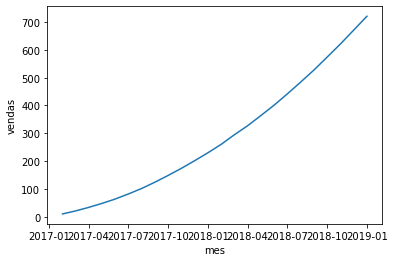

In [9]:
sns.lineplot(x = 'mes', y = 'vendas', data = dados)

As alterações visuais no gráfico foram feitas seguindo o padrão URBAN INSTITUTE.

Text(0, 0.5, 'Vendas (R$)')

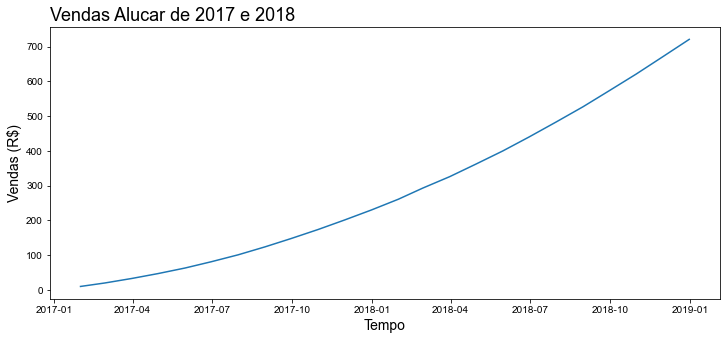

In [10]:
ax = sns.lineplot(x = 'mes', y = 'vendas', data = dados)
# Altera o tamanho de exibição do gráfico
ax.figure.set_size_inches(12,5)

# Setando cores diferente
sns.set_palette('Accent')

# Adiciona um grid de linhas no gráfico
sns.set_style('darkgrid')

# Altera o título do gráfico
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)

# Altera os atributos de título do eixo X
ax.set_xlabel('Tempo', fontsize = 14)

# Altera os atributos de título do eixo Y
ax.set_ylabel('Vendas (R$)', fontsize = 14)

In [11]:
dados.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [12]:
# O comando faz com que o total de vendas do mes 2 seja subtraído pelo mes 1, o 3 subtrai o 2 e adiante.
# O resultado é adicionado em uma nova váriavel na tabela.
dados['aumento'] = dados['vendas'].diff()

In [13]:
dados.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


O dataframe mostra a diferença de aumento de um mês para o outro em relação ao mês anterior
ex: o mês 2 teve 13 vendas a mais que o mês 1, e o mês 4 teve um aumento de 14 vendas em relação ao mês 3.

Visualizaremos o gráfico com a nova variável e a diferença de ganhos entre os meses

Text(0, 0.5, 'Aumento')

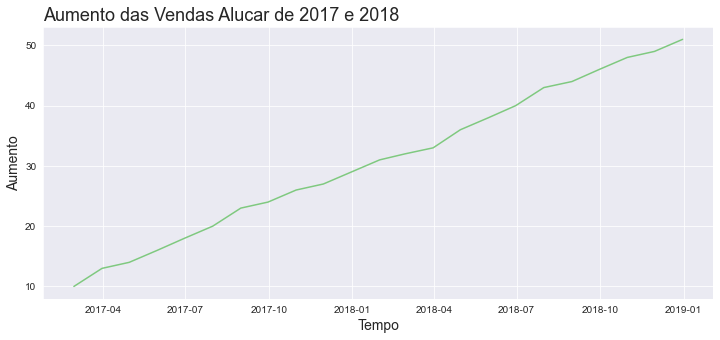

In [14]:
ax = sns.lineplot(x = 'mes', y = 'aumento', data = dados)
# Altera o tamanho de exibição do gráfico
ax.figure.set_size_inches(12,5)

# Setando cores diferente
sns.set_palette('Accent')

# Adiciona um grid de linhas no gráfico
sns.set_style('darkgrid')

# Altera o título do gráfico
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)

# Altera os atributos de título do eixo X
ax.set_xlabel('Tempo', fontsize = 14)

# Altera os atributos de título do eixo Y
ax.set_ylabel('Aumento', fontsize = 14)

##### Definindo uma função para gerar o gráfico com todos os requisitos

In [15]:
def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x = x, y = y, data = dataset)
    # Altera o tamanho de exibição do gráfico
    ax.figure.set_size_inches(12,5)

    # Setando cores diferente
    sns.set_palette('Accent')

    # Adiciona um grid de linhas no gráfico
    sns.set_style('darkgrid')

    # Altera o título do gráfico
    ax.set_title(titulo, loc = 'left', fontsize = 18)

    # Altera os atributos de título do eixo X
    ax.set_xlabel(labelx, fontsize = 14)

    # Altera os atributos de título do eixo Y
    ax.set_ylabel(labely, fontsize = 14)

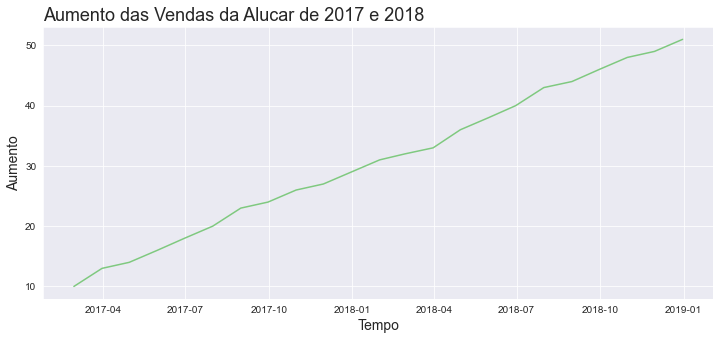

In [16]:
plotar('Aumento das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', dados)

In [17]:
dados['aceleracao'] = dados['aumento'].diff()
dados.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


A nova variável aceleração, mostra o quanto acelerou essa diferença em relação ao aumento das vendas
ex: se no mês 2 o aumento foi de 13 vendas a mais que no mês 1, e o mês 3 foi de 14 vendas a mais que o mês 2,
a difença então é de 1 venda a mais no aumento do mês 3 em relaçao ao mês 2, de 13 para 14.

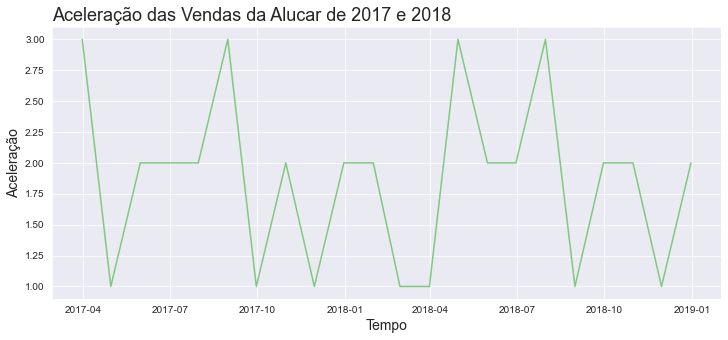

In [18]:
plotar('Aceleração das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', dados)

Podemos ver que todo mês a Alucar cresce em vendas, em escalas de 1 a 3
Percebemos também que em todo esse tempo não tiveram nenhum valor negativo, sempre se manteram positivo em relação ao
aumento de vendas e crescendo todo mês no mínimo 1 ponto.

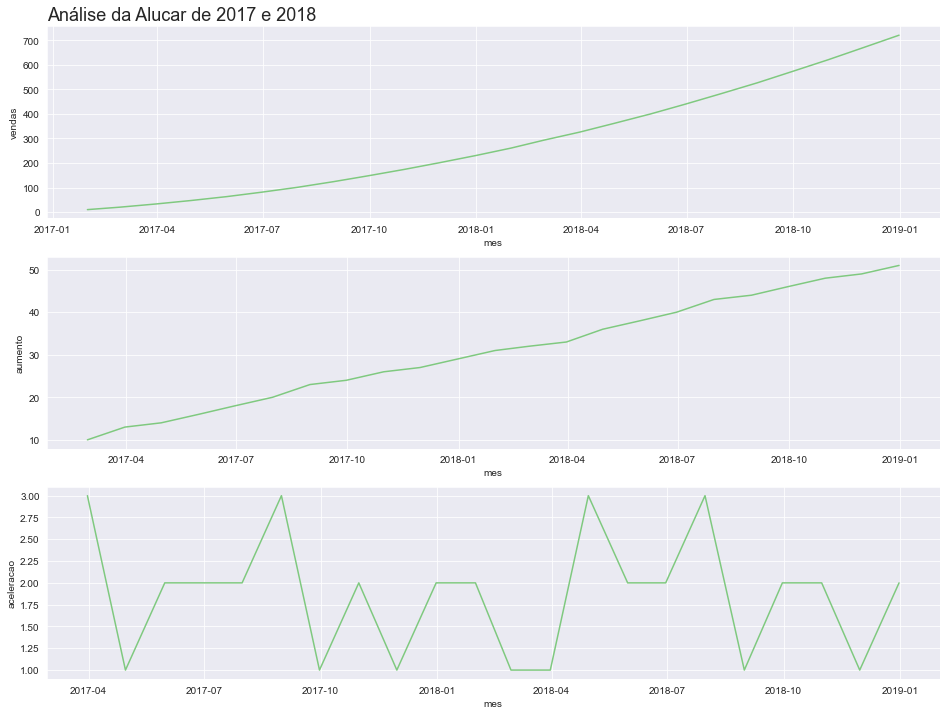

In [19]:
plt.figure(figsize = (16, 12))

# Define quantos graficos seram gerados, o priemrio na posição 1
ax = plt.subplot(3, 1, 1)

# Seta o título dos gráficos
ax.set_title('Análise da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = dados)

# Segundo gráfico na linha posição 2
plt.subplot(3, 1, 2)
sns.lineplot(x = 'mes', y = 'aumento', data = dados)

# Terceiro gráfico na posição 3
plt.subplot(3, 1, 3)
sns.lineplot(x = 'mes', y = 'aceleracao', data  = dados)

In [20]:
# Função para plotar 3 gráficos em linha
def plot_comparacao(x, y1, y2, y3, titulo, dataset):
    plt.figure(figsize = (16, 12))

    # Define quantos graficos seram gerados, o priemrio na posição 1
    ax = plt.subplot(3, 1, 1)

    # Seta o título dos gráficos
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)

    # Segundo gráfico na linha posição 2
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)

    # Terceiro gráfico na posição 3
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data  = dataset)

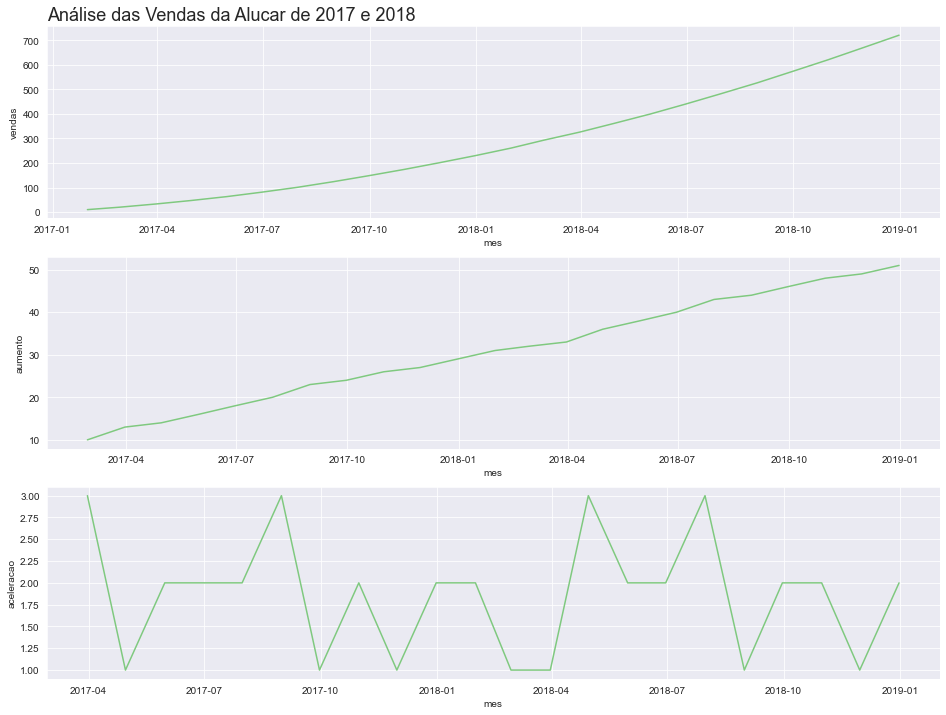

In [21]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
               'Análise das Vendas da Alucar de 2017 e 2018', dados)

# Autocorrelação

In [22]:
from pandas.plotting import autocorrelation_plot

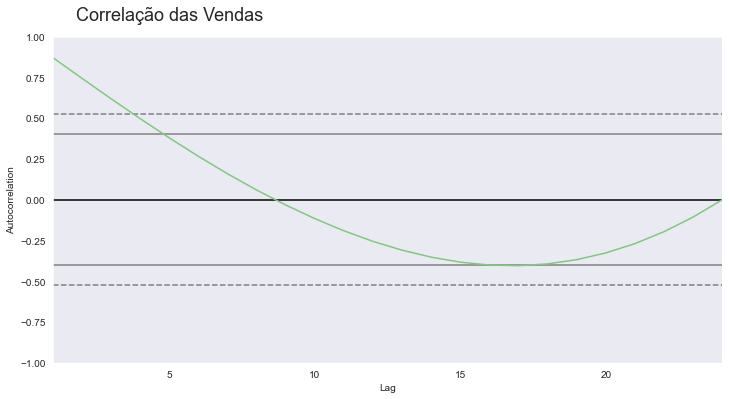

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.26, y = 0.95) # x e y posição do título
autocorrelation_plot(dados['vendas'])
ax = ax

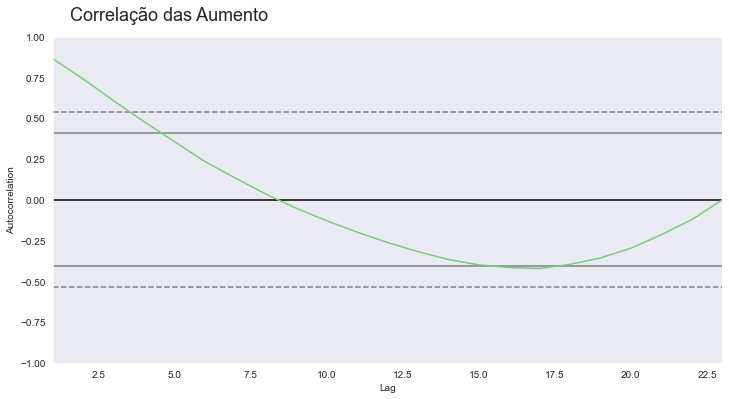

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aumento', fontsize = 18, x = 0.26, y = 0.95) # x e y posição do título
autocorrelation_plot(dados['aumento'][1:])
ax = ax

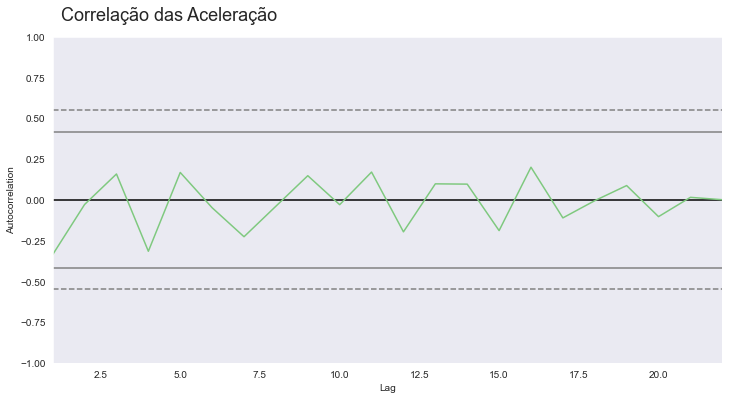

In [25]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aceleração', fontsize = 18, x = 0.26, y = 0.95) # x e y posição do título
autocorrelation_plot(dados['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [26]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [27]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [28]:
assinantes.shape

(24, 2)

In [29]:
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [30]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [31]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

### A base de dados contém 24 tuplas com 2 colunas, nenhum valor nulo, e o type mês foi alterado para datetime

In [32]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


### Adicionado duas novas variaveis, o qual a primeira retem a diferença dos assinantes referente ao mês anterior
### A segunda Variável retorna a diferença do aumento em relação ao aumento do mês anterior
### ex: do mês 1 para o mês 2 houve um aumento de 11 assinantes, 1 assinante a mais no aumento comparado ao mês 1

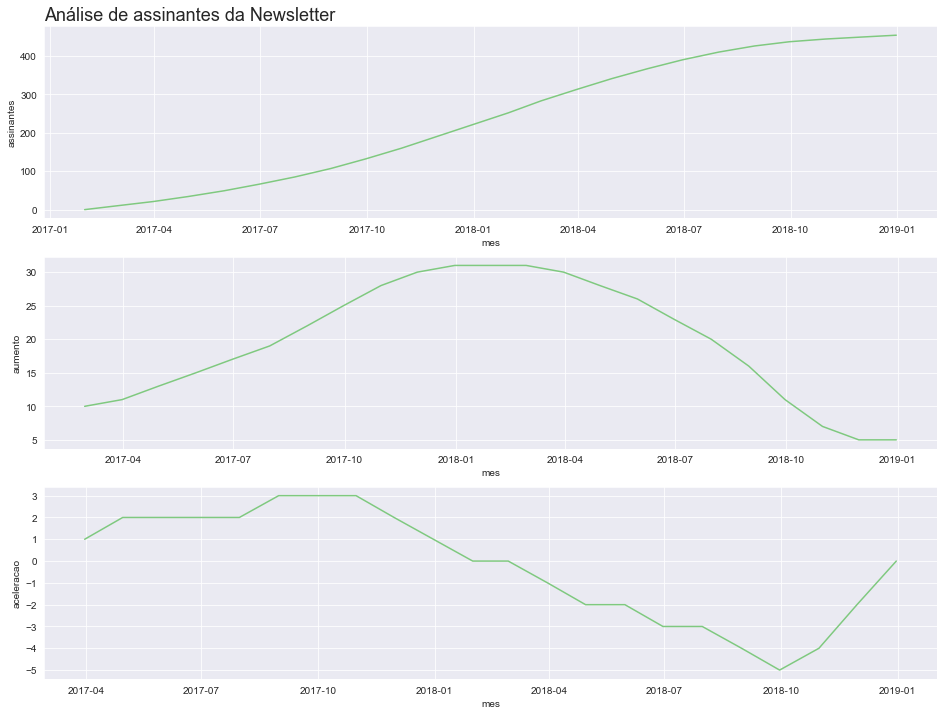

In [33]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', 'Análise de assinantes da Newsletter', assinantes)

Grafico 1: Houve um aumento de assinantes no deccorer do tempo, a partir do mês 10/2018 a curva deixa de ser constante e cada vez mais vai ficando horizontal, o que demonstra uma sequência de perdas de assinaturas.

Grafico 2: Confirma o aumento do gráfico 1, e mostra como foi diminuindo o número de assinantes mensais a partir do mês 01/2018

Grafico 3: Mostra a diferença de ganhos e perdas de assinanstes no mês, e começou a ficar negativo a partir do mês 4/2018 até o mês 10/2018 e então volta subir e normalizar apenas no mês 01/2019

# Chocolura - Analisando as vendas

In [34]:
dados = pd.read_csv('dados/chocolura.csv')
dados.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [37]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [38]:
dados['mes'] = pd.to_datetime(dados['mes'])

In [41]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


## 24 tuplas, 2 colunas, 0 dados nulos

In [42]:
dados['aumento'] = dados['vendas'].diff()
dados['aceleracao'] = dados['aumento'].diff()

In [43]:
dados.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


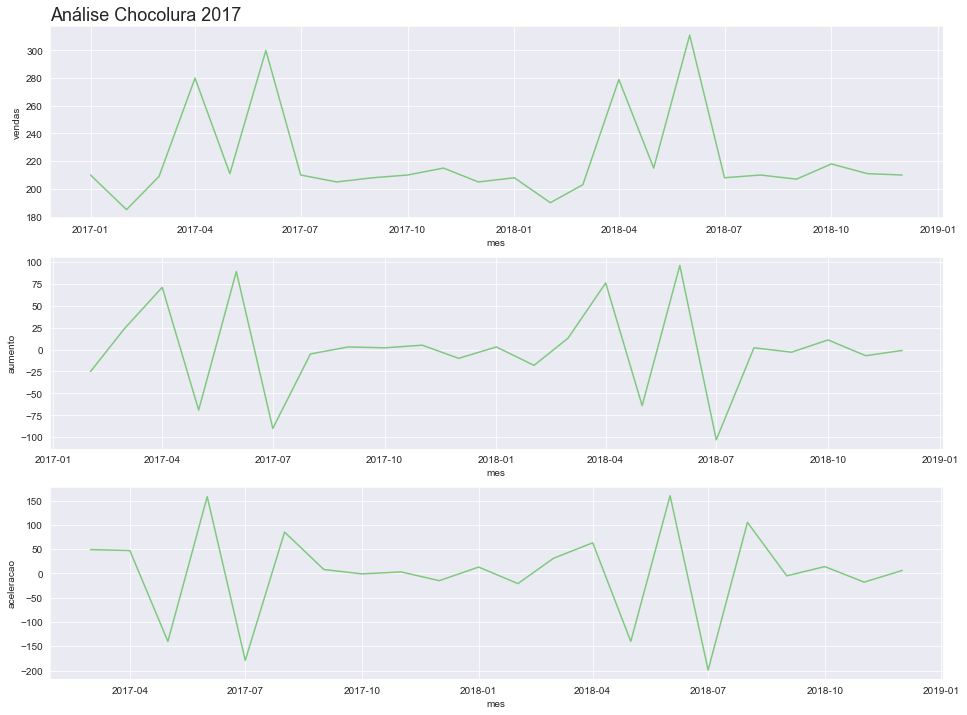

In [46]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 'Análise Chocolura 2017', dados)

### Os gráficos mostram que há uma sazionalidade, o mês 4 e o mês 7 de todo ano tem um grande aumento de vendas chegando a atingir 300 vendas no mês 7, enquanto que no decorrer do ano as vendas são um pouco lineares entre 200 e 220 vendas.

# Chocolura - Vendas diárias Outubro e Novembro

In [49]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [50]:
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


### 61 tuplas, 2 colunas, nenhum dado nulo

In [51]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [52]:
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [54]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


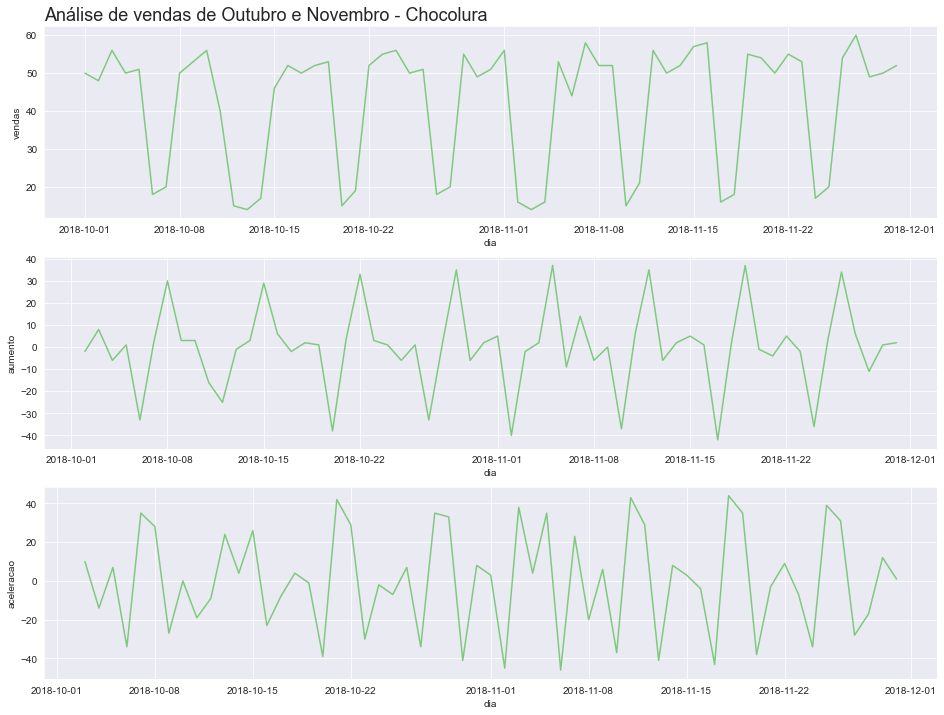

In [56]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', 'Análise de vendas de Outubro e Novembro - Chocolura', vendas_por_dia)

In [66]:
vendas_por_dia['dias_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [67]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dias_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [69]:
vendas_por_dia['dias_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [70]:
traducao_dias = {'Monday': 'Segunda', 'Tuesday': 'Terca', 'Wednesday': 'Quarta',
                 'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sabado',
                'Sunday': 'Domingo'}

In [71]:
vendas_por_dia['dias_da_semana'] = vendas_por_dia['dias_da_semana'].map(traducao_dias)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dias_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [72]:
vendas_agrupadas = vendas_por_dia.groupby('dias_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

<ipython-input-72-673381540ac4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dias_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [73]:
vendas_agrupadas

,vendas,aumento,aceleracao
dias_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


### As quedas de vendas podem se referir por regras de negócios, como feriados nacionais, e finais de semanas com horário de atendimento reduzido